In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#######################
#   Helper functions  #
#######################
# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# Logistic unit
def logistic(x,w,b):
    s = sigmoid(a(x,w,b))
    y = np.round(s)
    return np.array([y,s]).T

Let's code up a 2-layer MLP. Our network will take in 2-dimensional input, will have a single hidden layer of 3 units, and will have a single output classification.

We'll create randomized initial weights for our network.

In [3]:
###########################
#Setting up dimensions of 2 Layer NN

n_dims = 2
n_hidden_units = 3

# Settng up the weight parameters for Layer 1
w_11, w_12, w_13, w_21, w_22, w_23 = np.random.random(n_dims * n_hidden_units)

# Setting up weight parameters for Layer 2
v_1,v_2,v_3 = np.random.random(n_hidden_units)

# Random intializiation of the biases
# Layer 1
b_11,b_12,b_13 = np.random.random(n_hidden_units)
b_1 = np.array([b_11,b_12,b_13])
# Layer 2
b_2 = np.random.random(1)

# Restructing for ease of implementation
w_1 = np.array([w_11,w_12,w_13])
w_2 = np.array([w_21,w_22, w_23])
#w_3 = np.array([w_31,w_32])

w = np.array([w_1,w_2])
v = np.array([v_1,v_2,v_3])  

In [4]:
w

array([[ 0.02571   ,  0.24787308,  0.48271118],
       [ 0.13146063,  0.18589594,  0.41814734]])

In [5]:
def feedforward_network_v1(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((num_rows))
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Linear activations into hidden units
        a1 = x_i[0]*w[0,0] + x_i[1]*w[1,0] + b_1[0]
        a2 = x_i[0]*w[0,1] + x_i[1]*w[1,1] + b_1[1]
        a3 = x_i[0]*w[0,2] + x_i[1]*w[1,2] + b_1[2]
        
        # output of hidden units
        h_1 = sigmoid(a1)
        h_2 = sigmoid(a2)
        h_3 = sigmoid(a3)
        h = np.array([h_1,h_2,h_3])
        
        # Output of network
        y[i] = sigmoid(h_1*v[0] + h_2*v[1] + h_3*v[2] + b_2)
    
    return np.array(y)


In [6]:
# here's some randomized input data
num_samples=50
x = np.random.uniform(low=(-5.0), high=5.0, size=2*num_samples).reshape(num_samples,2)

In [7]:
feedforward_network_v1(x[:5,:], w, v, b_1, b_2)

array([ 0.82292514,  0.75988018,  0.75239936,  0.79952878,  0.76473833])

Note that all of this arithmetic was done explicity by indexing into our weight matrixes and vectors. But we know we can accomplish the same thing with vector arithmetic. For the linear activations into a hidden unit, this weighted sum is the same as a dot product.

In [8]:
def feedforward_network_v2(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    # Setting up our output y
    l,_ = x.shape
    y = np.zeros((l))
    
    for i in range(l):
        x_i = x[i,:]
        # Setting up the hidden units
        h_1 = sigmoid(a(x[i,:],w[:,0],b_1[0]))
        h_2 = sigmoid(a(x[i,:],w[:,1],b_1[1]))
        h_3 = sigmoid(a(x[i,:],w[:,2],b_1[2]))
        h = np.array([h_1,h_2,h_3])
        # Calculating the output
        y[i] = sigmoid(a(h,v,b_2))
    
    return np.array(y)



In [9]:
feedforward_network_v2(x[:5,:], w, v, b_1, b_2)

array([ 0.82292514,  0.75988018,  0.75239936,  0.79952878,  0.76473833])

Finally, note that we're using a for-loop to compute the forward pass for each input X. This can also be vectorized instead of using a loop. 

In [10]:
def feedforward_network_v3(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    
    a = np.dot(x,w) + b_1
    h = sigmoid(a)
    y = sigmoid(np.dot(h,v) + b_2)

    return np.array(y)


In [11]:
feedforward_network_v3(x[:5,:], w, v, b_1, b_2)

array([ 0.82292514,  0.75988018,  0.75239936,  0.79952878,  0.76473833])

### Function Exploration

We'll pick a simple 1D regression example: we are representing arbitrary functions y of x. So we have a scalar input and a scalar output. Let's explore what kinds of functions our neural net is able to produce.

By drawing random weights, we'll visualize a particular "setting" of a neural net, to see what kind of functions are possible. 

Depending on the number of hidden nodes, and the strength of the weights, we'll find that we can represent some pretty complex functions with a neural net. 

In [12]:
def randomize_weights(num_hidden_nodes, input_dim=1, wt_scale=1):
    w = wt_scale*np.random.randn(num_hidden_nodes*input_dim).reshape((input_dim, num_hidden_nodes))
    v = wt_scale*np.random.randn(num_hidden_nodes)
    h_bias = wt_scale*np.random.randn(num_hidden_nodes)
    y_bias = wt_scale*np.random.randn(1) 
    return (w, v, h_bias, y_bias)

(0, 1)

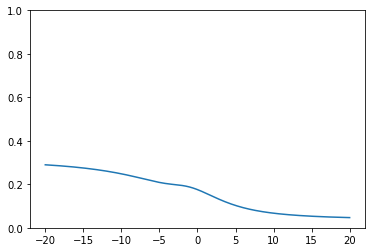

In [13]:
x=np.expand_dims(np.linspace(-20,20,250), 1)
z = randomize_weights(3,wt_scale=1)
y_pred = feedforward_network_v3(x, *z)
plt.plot(x, y_pred)
plt.ylim((0,1))

## Exercise
Code up the XOR network from Chapter 6 of the book. Use the weights provided on page 174 to compute the forward pass. Use a sigmoid for the activation function. What is the predicted output for each of the 4 observations of the XOR dataset?

In [14]:
# Set parameters based on the book page 174
ex_x = []
ex_x.append([0,0])
ex_x.append([0,1])
ex_x.append([1,0])
ex_x.append([1,1])

ex_w = np.array([1,1,1,1]).reshape(2,2)
ex_v = np.array([1,-2])
ex_b_1 = np.array([0,-1])
ex_b_2 = np.array([0])

feedforward_network_v3(ex_x, ex_w, ex_v, ex_b_1, ex_b_2)

array([ 0.49053042,  0.43316699,  0.43316699,  0.3586289 ])

## Exercise

Our representation of these ANN transformations can have an impact on computational efficiency. As you might guess, when we leverage matrix and vector arithmetic, our feedforward computations are much faster.

Code up a simple multilayer network of your choice. Implement the feedfoward transformations with vector operations and then with explicit for-loop operations. Time how long it takes in each case to compute a forward pass for a set of input datapoints.

In [15]:
# here's some randomized input data
num_samples=50
x = np.random.uniform(low=(-5.0), high=5.0, size=2*num_samples).reshape(num_samples,2)

In [16]:
###########################
#Setting up dimensions of 2 Layer NN

n_dims = 2
n_hidden_units = 3

# Settng up the weight parameters for Layer 1
w_11, w_12, w_13, w_21, w_22, w_23 = np.random.random(n_dims * n_hidden_units)

# Setting up weight parameters for Layer 2
v_1,v_2,v_3 = np.random.random(n_hidden_units)

# Random intializiation of the biases
# Layer 1
b_11,b_12,b_13 = np.random.random(n_hidden_units)
b_1 = np.array([b_11,b_12,b_13])
# Layer 2
b_2 = np.random.random(1)

# Restructing for ease of implementation
w_1 = np.array([w_11,w_12,w_13])
w_2 = np.array([w_21,w_22, w_23])
#w_3 = np.array([w_31,w_32])

w = np.array([w_1,w_2])
v = np.array([v_1,v_2,v_3]) 

In [17]:
# Import time package
import time

In [18]:
# Loop network
loop_nw_start = time.time()
feedforward_network_v2(x[:5,:], w, v, b_1, b_2)
loop_nw_end = time.time()
print(loop_nw_end - loop_nw_start)

0.0005247592926025391


In [19]:
# Vectorized network
vt_nt_start = time.time()
feedforward_network_v3(x[:5,:], w, v, b_1, b_2)
vt_nt_end = time.time()
print(vt_nt_end - vt_nt_start)

0.00013685226440429688


In [20]:
faster = (loop_nw_end - loop_nw_start)/(vt_nt_end - vt_nt_start)
print("Vector-operation is faster than loop-operation by {0} times".format(faster))

Vector-operation is faster than loop-operation by 3.8344947735191637 times


### Exercise (Optional) - Deep Networks

In our 2-layer MLP, the hidden layer was a little bit specialized because its inputs were datapoints X and its output went into predicting targets Y. But none of that *has* to be the case. In a more general form, a hidden layer's input could be the outputs of another hidden layer. And a hidden layer's outputs could go on to be the inputs for another hidden layer. This framework is a **deep neural network**. 

Extend our prevoius 2-layer MLP code into a 3-layer MLP. 


Use the same number of hidden nodes in both layers (3 is fine).
Think about what additional weights you'll need: 
 - another weight matrix? 
 - another bias vector? 

In [21]:
def deep_feedforward_network(x, w1, w2, v, b_1, b_2, b_3):
    h1 = sigmoid(np.dot(x, w1) + b_1)
    h2 = sigmoid(np.dot(h1, w2) + b_2)
    y = sigmoid(np.dot(h2, v) + b_3)
    
    return np.array(y)

In [22]:
num_samples = 50
x = np.random.uniform(low=(-5.0), high=5.0, size=2*num_samples).reshape(num_samples, 2)
w1 = np.random.random(6).reshape(2,3)
w2 = np.random.random(9).reshape(3,3)

deep_feedforward_network(x[:5,:], w1, w2, v, b_1, b_2, b_2)

array([ 0.88504394,  0.90398886,  0.87610845,  0.90083577,  0.90410627])